## _Explore Hits_

- Perform _EDA_ on _hits_ Data.

In [1]:
import sys, os, glob, yaml

In [2]:
import math
import random
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import trackml.dataset
import seaborn as sns

In [4]:
sys.path.append('src')

### _Dataset_

In [5]:
# mu- data (old)
# input_dir = './data_sets/pandaml/data_3.0_7.0_GeV/'

# mu+mu- data (current)
# input_dir = './data_sets/pandaml/data_0.1_1.5_GeV/'

# pbarp data (coming)
# input_dir = os.environ['HOME']+'/current/2_deepana/pandaml/data/'

In [6]:
input_dir = "./data"

In [7]:
# Find All Input Data Files (hits.csv, cells.csv, particles.csv, truth.csv)
all_files = os.listdir(input_dir)

# Extract File Prefixes (use e.g. xxx-hits.csv)
suffix = '-hits.csv'
file_prefixes = sorted(os.path.join(input_dir, f.replace(suffix, ''))
                       for f in all_files if f.endswith(suffix))

In [8]:
file_prefixes[:10]

['./data/event0000000000',
 './data/event0000000001',
 './data/event0000000002',
 './data/event0000000003',
 './data/event0000000004',
 './data/event0000000005',
 './data/event0000000006',
 './data/event0000000007',
 './data/event0000000008',
 './data/event0000000009']

In [9]:
event_id = 0
event_prefix = file_prefixes[event_id]

In [10]:
# load an event
hits, tubes, particles, truth = trackml.dataset.load_event(event_prefix)

## Hits

The hits file contains the following values for each hit/entry:

* __hit_id__: numerical identifier of the hit inside the event.
* __x, y, z__: measured x, y, z position (in millimeter) of the hit in global coordinates.
* __volume_id__: numerical identifier of the detector group.
* __layer_id__: numerical identifier of the detector layer inside the group.
* __module_id__: numerical identifier of the detector module inside the layer.


Here we have the $x, y, z$ global coordinates (in cm) of where the particles hit the detector surface. The volume/layer/module id could in principle be deduced from x, y, z. They are given here to simplify detector-specific data handling.

In [11]:
hits.head()

,hit_id,x,y,z,volume_id,layer_id,module_id
0,1,-6.72099,2.01500,10.42000,2,12,352
1,2,-1.36853,-0.98500,1.98000,2,4,329
2,3,-5.03063,-3.96500,15.22000,2,13,359
3,4,4.88378,1.93577,-3.57089,2,6,15
4,5,-1.43258,-1.19140,4.42000,2,5,333


### Assign New Quantities

In [12]:
# (1) add a new column
# hits['r'] = hits.apply(lambda row: np.sqrt(row.x**2 + row.y**2), axis=1)
# hits = hits.assign(r=hits.apply(lambda row: np.sqrt(row.x**2 + row.y**2), axis=1))

In [13]:
# (2) add new columns
r = np.sqrt(hits.x**2 + hits.y**2)
phi = np.arctan2(hits.y, hits.x)
hits.assign(r=r, phi=phi).head()

,hit_id,x,y,z,volume_id,layer_id,module_id,r,phi
0,1,-6.72099,2.01500,10.42000,2,12,352,7.016547,2.850313
1,2,-1.36853,-0.98500,1.98000,2,4,329,1.686149,-2.517734
2,3,-5.03063,-3.96500,15.22000,2,13,359,6.405346,-2.474106
3,4,4.88378,1.93577,-3.57089,2,6,15,5.253428,0.377371
4,5,-1.43258,-1.19140,4.42000,2,5,333,1.863255,-2.447851


### Sort a Quantities

In [14]:
# sort "r" column
hits.assign(r=r, phi=phi).sort_values(by=['r']).head()

,hit_id,x,y,z,volume_id,layer_id,module_id,r,phi
16,17,-1.254720,0.431039,1.98,2,4,329,1.326694,2.810690
1,2,-1.368530,-0.985000,1.98,2,4,329,1.686149,-2.517734
4,5,-1.432580,-1.191400,4.42,2,5,333,1.863255,-2.447851
5,6,-0.987059,1.680400,2.42,2,4,328,1.948853,2.101896
22,23,1.047470,-1.852940,1.98,2,2,271,2.128516,-1.056281


In [15]:
# sort "r" column and re-index
hits.assign(r=r, phi=phi).sort_values(by=['r']).reset_index(drop=True).head()

,hit_id,x,y,z,volume_id,layer_id,module_id,r,phi
0,17,-1.254720,0.431039,1.98,2,4,329,1.326694,2.810690
1,2,-1.368530,-0.985000,1.98,2,4,329,1.686149,-2.517734
2,5,-1.432580,-1.191400,4.42,2,5,333,1.863255,-2.447851
3,6,-0.987059,1.680400,2.42,2,4,328,1.948853,2.101896
4,23,1.047470,-1.852940,1.98,2,2,271,2.128516,-1.056281


### Creat an Event

In [16]:
truth.head()

,hit_id,tx,ty,tz,tpx,tpy,tpz,weight,particle_id
0,1,-6.71486,2.016780,10.41000,-0.171281,0.035818,0.258613,1.0,3
1,2,-1.36106,-0.979766,1.97000,-0.489971,-0.356742,0.712462,1.0,2
2,3,-5.02722,-3.964340,15.21000,-0.262345,-0.186827,0.765993,1.0,10
3,4,4.87547,1.929970,-3.56461,0.568398,0.232614,-0.416260,1.0,4
4,5,-1.42838,-1.188260,4.41000,-0.251019,-0.204107,0.768383,1.0,10


In [17]:
particles.head()

,particle_id,vx,vy,vz,px,py,pz,q,nhits,pdgcode,start_time,primary
0,1,0.0,0.0,0.0,0.417332,0.938952,-0.457557,1,27,13,0,1
1,2,0.0,0.0,0.0,-0.493657,-0.352344,0.712380,1,31,13,0,1
2,3,0.0,0.0,0.0,-0.166948,0.059120,0.264588,1,36,13,0,1
3,4,0.0,0.0,0.0,0.573950,0.219286,-0.417693,1,28,13,0,1
4,5,0.0,0.0,0.0,-0.296571,0.510891,0.733194,1,30,13,0,1


#### Noise or Not

What does **left** and **inner** means here?

```
# whether noise is true or false
if noise:
    truth = truth.merge(particles[["particle_id", "vx", "vy", "vz"]], on="particle_id", how="left")
else:
    truth = truth.merge(particles[["particle_id", "vx", "vy", "vz"]], on="particle_id", how="inner")
    
# this is strange to build pt from tpx & tpy
truth = truth.assign(pt=np.sqrt(truth.tpx**2 + truth.tpy**2))
```

Investigate as one should expect that why the pt is constructed from `tpx` and `tpy` in both cases. What is the impact of merging from `left` or `inner`.


This is from Exa.TrkX-HSF Processing Stage.

In [18]:
# if noise==false, then else clause will be executed.
# first merge truth & particles on particle_id
event = truth.merge(particles[["particle_id", "vx", "vy", "vz"]], on="particle_id", how="inner")

In [19]:
# assign pt (from tpx & tpy ???) and add to truth~event
event = event.assign(pt=np.sqrt(truth.tpx**2 + truth.tpy**2))

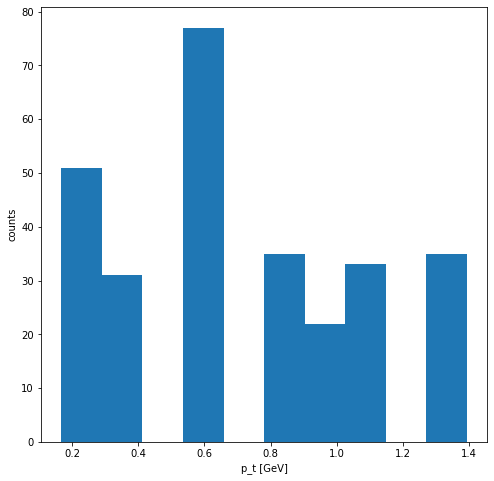

In [20]:
plt.close('all')
fig = plt.figure(figsize=(8,8))
plt.hist(event.pt, bins=10)
plt.xlabel('p_t [GeV]')
plt.ylabel('counts')
# plt.xlim((0.1, 1.5))
# plt.ylim((5, 40))
plt.show()

In [21]:
# merge hits with event~truth, first find r & phi 
event = hits.assign(r=r, phi=phi).merge(event, on="hit_id")
event.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,r,phi,tx,...,tz,tpx,tpy,tpz,weight,particle_id,vx,vy,vz,pt
0,1,-6.72099,2.01500,10.42000,2,12,352,7.016547,2.850313,-6.71486,...,10.41000,-0.171281,0.035818,0.258613,1.0,3,0.0,0.0,0.0,0.174986
1,2,-1.36853,-0.98500,1.98000,2,4,329,1.686149,-2.517734,-1.36106,...,1.97000,-0.489971,-0.356742,0.712462,1.0,2,0.0,0.0,0.0,1.390586
2,3,-5.03063,-3.96500,15.22000,2,13,359,6.405346,-2.474106,-5.02722,...,15.21000,-0.262345,-0.186827,0.765993,1.0,10,0.0,0.0,0.0,0.321714
3,4,4.88378,1.93577,-3.57089,2,6,15,5.253428,0.377371,4.87547,...,-3.56461,0.568398,0.232614,-0.416260,1.0,4,0.0,0.0,0.0,0.226291
4,5,-1.43258,-1.19140,4.42000,2,5,333,1.863255,-2.447851,-1.42838,...,4.41000,-0.251019,-0.204107,0.768383,1.0,10,0.0,0.0,0.0,0.321370


In [22]:
# assign event_id to this event
event = event.assign(event_id=int(event_prefix[-10:]))

In [23]:
event.head()

,hit_id,x,y,z,volume_id,layer_id,module_id,r,phi,tx,...,tpx,tpy,tpz,weight,particle_id,vx,vy,vz,pt,event_id
0,1,-6.72099,2.01500,10.42000,2,12,352,7.016547,2.850313,-6.71486,...,-0.171281,0.035818,0.258613,1.0,3,0.0,0.0,0.0,0.174986,0
1,2,-1.36853,-0.98500,1.98000,2,4,329,1.686149,-2.517734,-1.36106,...,-0.489971,-0.356742,0.712462,1.0,2,0.0,0.0,0.0,1.390586,0
2,3,-5.03063,-3.96500,15.22000,2,13,359,6.405346,-2.474106,-5.02722,...,-0.262345,-0.186827,0.765993,1.0,10,0.0,0.0,0.0,0.321714,0
3,4,4.88378,1.93577,-3.57089,2,6,15,5.253428,0.377371,4.87547,...,0.568398,0.232614,-0.416260,1.0,4,0.0,0.0,0.0,0.226291,0
4,5,-1.43258,-1.19140,4.42000,2,5,333,1.863255,-2.447851,-1.42838,...,-0.251019,-0.204107,0.768383,1.0,10,0.0,0.0,0.0,0.321370,0


## The $x, y, z$ Distributions

### (+) Vertical Intersection ($x, y$) in Detection Layers

As shown in the figure below, the hits are semi evenly distributed on the detector surface $x, y$.  The white circle in the center of the plot is where the beam pipe lies.  Thanks [agerom] for [the clarification][clar].

The colors represent different detector volumes.  Thanks to [Joshua Bonatt's notebook][josh].

[josh]: https://www.kaggle.com/jbonatt/trackml-eda-etc
[clar]: https://www.kaggle.com/wesamelshamy/trackml-problem-explanation-and-data-exploration/comments#323803
[agerom]: https://www.kaggle.com/artemiosgeromitsos

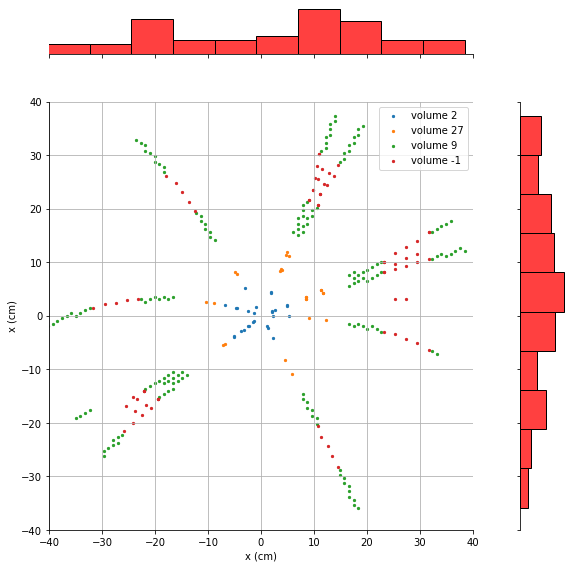

In [28]:
# Plotting with Seaborn & Matplotlib:
g = sns.jointplot(data=hits, x='x', y='y', space=1, height=8, color="r")
g.ax_joint.cla()
plt.sca(g.ax_joint)

volumes = hits.volume_id.unique()
for volume in volumes:
    v = hits[hits.volume_id == volume]
    plt.scatter(v.x, v.y, s=5, label='volume {}'.format(volume))

plt.xlabel('x (cm)')
plt.ylabel('x (cm)')
plt.xlim((-40,40))
plt.ylim((-40,40))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.legend(fontsize=10, loc='best')
plt.savefig("xy_barrel.pdf")

### (+) Horizonal Intersection ($y, z$) in Detection Layers
You can think of the chart below as a horizontal intersection in the detection surface, where every dot is a hit.  Notice the relationship between the different activity levels in this chart and the one above for $x, y$.

Again, the colors represent different volumes in the detector surface.

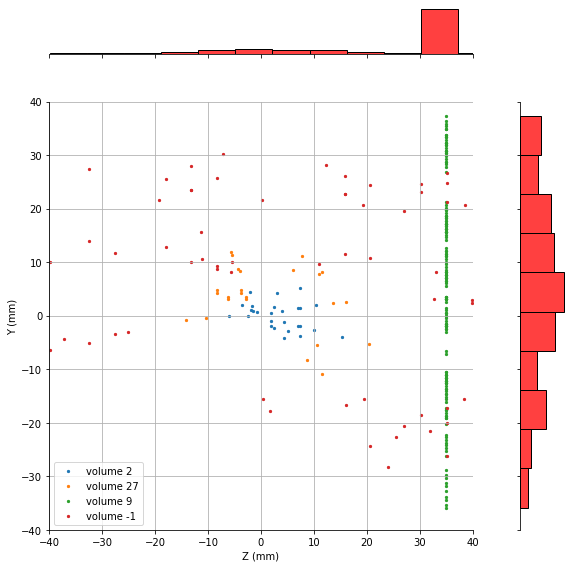

In [25]:
g = sns.jointplot(data=hits, x='z', y='y', space=1, height=8, color="r")
g.ax_joint.cla()
plt.sca(g.ax_joint)

volumes = hits.volume_id.unique()
for volume in volumes:
    v = hits[hits.volume_id == volume]
    plt.scatter(v.z, v.y, s=5, label='volume {}'.format(volume))
    
plt.xlabel('Z (mm)')
plt.ylabel('Y (mm)')
plt.xlim((-40,40))
plt.ylim((-40,40))
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(True)
plt.legend(fontsize=10, loc='best')
plt.show()

### (+) 3D Intersection ($x, y, z$) in Detection Layers

And here is how the hits in this event look like in 3D.  Again, a sample from one event.  This combines the previous two charts in 3D.

Notice how the particles penetrate the detector surface along $z$ coordinate.

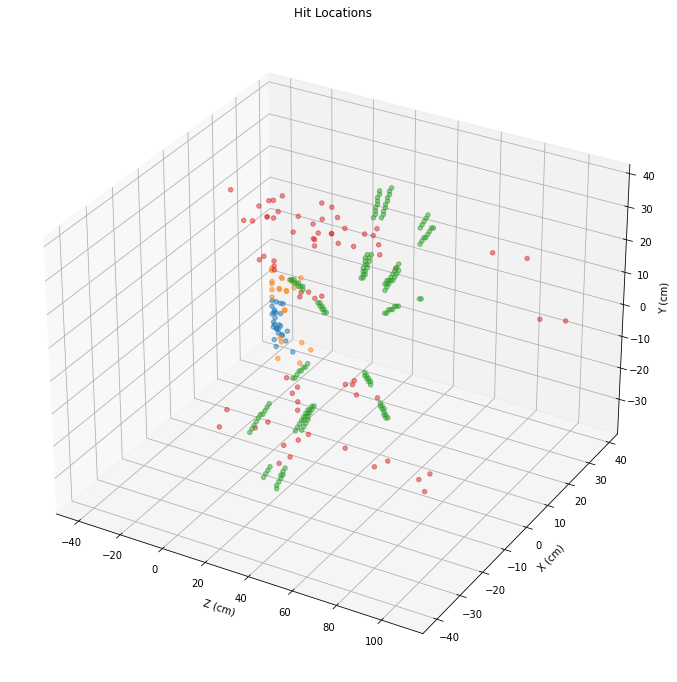

In [26]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(111, projection='3d')
for volume in volumes:
    v = hits[hits.volume_id == volume]
    ax.scatter(v.z, v.x, v.y, label='volume {}'.format(volume), alpha=0.5)

ax.set_title('Hit Locations')
ax.set_xlabel('Z (cm)')
ax.set_ylabel('X (cm)')
ax.set_zlabel('Y (cm)')
plt.show()